## Import Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from pathlib import Path
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load the Data

In [3]:
file_path = Path("us_perm_visas.csv")
df = pd.read_csv(file_path, low_memory=False)

In [4]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


In [5]:
df.tail()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
374357,NaN,Buena Park,Law Offices of Yohan Lee,CA,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,...,NaN,NaN,N,NaN,"28,330.00",NaN,Year,NaN,NaN,NaN
374358,NaN,Seattle,MacDonald Hoague & Bayless,WA,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,...,NaN,Y,N,NaN,"122,000.00","142,000.00",Year,NaN,NaN,NaN
374359,NaN,Schaumburg,International Legal and Business Services Grou...,IL,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"79,082.00","79,082.00",Year,NaN,NaN,NaN
374360,NaN,LOS ANGELES,LAW OFFICES OF JAMES S HONG,CA,NaN,NaN,A-16357-84250,2016-12-30,Withdrawn,B-2,...,NaN,NaN,N,NaN,"37,981.00",NaN,Year,NaN,NaN,NaN
374361,NaN,Phoenix,"Fragomen, Del Rey, Bernsen & Loewy, LLP",AZ,NaN,NaN,A-16279-59292,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"84,926.00","121,500.00",Year,NaN,NaN,NaN


In [6]:
df.shape

(374362, 154)

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Data columns (total 154 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   add_these_pw_job_title_9089             object 
 1   agent_city                              object 
 2   agent_firm_name                         object 
 3   agent_state                             object 
 4   application_type                        object 
 5   case_no                                 object 
 6   case_number                             object 
 7   case_received_date                      object 
 8   case_status                             object 
 9   class_of_admission                      object 
 10  country_of_citizenship                  object 
 11  country_of_citzenship                   object 
 12  decision_date                           object 
 13  employer_address_1                      object 
 14  employer_address_2                 

In [8]:
df.dtypes

add_these_pw_job_title_9089       object
agent_city                        object
agent_firm_name                   object
agent_state                       object
application_type                  object
                                  ...   
wage_offer_to_9089                object
wage_offer_unit_of_pay_9089       object
wage_offered_from_9089           float64
wage_offered_to_9089             float64
wage_offered_unit_of_pay_9089     object
Length: 154, dtype: object

In [57]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

add_these_pw_job_title_9089      89.011646
agent_city                       43.084163
agent_firm_name                  44.261697
agent_state                      43.952292
application_type                  0.000000
                                   ...    
wage_offered_from_9089           69.793468
wage_offered_to_9089             91.769053
wage_offered_unit_of_pay_9089    81.273444
case_received_year                0.000000
decision_year                     0.000000
Length: 156, dtype: float64

In [10]:
# Displaying number of missing values in each column
for column in df.columns:
    print("Attribute '{}' contains ".format(column),  df[column].isnull().sum().sum(), " missing values")

Attribute 'add_these_pw_job_title_9089' contains  332168  missing values
Attribute 'agent_city' contains  162908  missing values
Attribute 'agent_firm_name' contains  167365  missing values
Attribute 'agent_state' contains  166123  missing values
Attribute 'application_type' contains  239093  missing values
Attribute 'case_no' contains  239093  missing values
Attribute 'case_number' contains  135269  missing values
Attribute 'case_received_date' contains  135271  missing values
Attribute 'case_status' contains  0  missing values
Attribute 'class_of_admission' contains  22845  missing values
Attribute 'country_of_citizenship' contains  20633  missing values
Attribute 'country_of_citzenship' contains  353788  missing values
Attribute 'decision_date' contains  0  missing values
Attribute 'employer_address_1' contains  42  missing values
Attribute 'employer_address_2' contains  149193  missing values
Attribute 'employer_city' contains  14  missing values
Attribute 'employer_country' contai

Attribute 'ri_local_ethnic_paper_to' contains  253481  missing values
Attribute 'ri_posted_notice_at_worksite' contains  135360  missing values
Attribute 'ri_pvt_employment_firm_from' contains  357920  missing values
Attribute 'ri_pvt_employment_firm_to' contains  357922  missing values
Attribute 'ri_us_workers_considered' contains  357129  missing values
Attribute 'schd_a_sheepherder' contains  135288  missing values
Attribute 'us_economic_sector' contains  245294  missing values
Attribute 'wage_offer_from_9089' contains  114771  missing values
Attribute 'wage_offer_to_9089' contains  300728  missing values
Attribute 'wage_offer_unit_of_pay_9089' contains  115916  missing values
Attribute 'wage_offered_from_9089' contains  259715  missing values
Attribute 'wage_offered_to_9089' contains  343347  missing values
Attribute 'wage_offered_unit_of_pay_9089' contains  303663  missing values


## Data Cleaning

### 1. Visa Information

"application_type","case_received_date","case_status","class_of_admission","decision_date"

In [11]:
df["application_type"]=df["application_type"].fillna((df["application_type"].mode()[0]))

In [12]:
df['case_received_date'] = pd.to_datetime(df.case_received_date, format='%Y-%m-%d')

#Converting the date to contain just the year of application submission
df['case_received_year'] = df['case_received_date'].dt.year
df["case_received_year"]=df["case_received_year"].fillna((df["case_received_year"].mean()))

In [13]:
df['case_received_year'] = df['case_received_year'].astype(int)

In [14]:
print(df["case_status"].unique())

['Certified' 'Denied' 'Certified-Expired' 'Withdrawn']


In [15]:
print(df["class_of_admission"].unique())
df.class_of_admission.value_counts()

['J-1' 'B-2' 'H-1B' 'L-1' 'EWI' 'E-2' nan 'E-1' 'H-2B' 'TPS' 'F-1' 'B-1'
 'C-1' 'Not in USA' 'TN' 'H-4' 'O-1' 'R-1' 'L-2' 'Q' 'F-2' 'H-1B1'
 'Parolee' 'G-5' 'E-3' 'H-2A' 'VWT' 'P-1' 'A1/A2' 'D-1' 'A-3' 'R-2' 'H-1C'
 'H-3' 'J-2' 'P-4' 'I' 'H-1A' 'G-1' 'VWB' 'G-4' 'P-3' 'AOS/H-1B' 'O-3'
 'Parol' 'O-2' 'H1B' 'N' 'T-1' 'TD' 'M-1' 'K-1' 'U-1' 'AOS' 'P-2' 'C-3'
 'V-2' 'M-2']


H-1B          283018
L-1            19938
F-1            14946
Not in USA      8588
TN              4265
E-2             4237
B-2             3333
Parolee         2678
EWI             1955
J-1              963
F-2              960
E-3              878
O-1              805
H-4              739
B-1              620
H-1B1            551
E-1              549
L-2              531
H-2B             412
TPS              187
P-1              178
H-2A             157
A1/A2            155
R-1              112
G-4              108
J-2              101
I                 82
G-5               64
VWT               58
H-1A              41
P-3               40
C-1               40
H-3               37
A-3               29
M-1               26
O-2               20
TD                15
O-3               12
G-1               11
VWB               10
H-1C               8
C-3                7
R-2                7
Parol              6
P-4                6
D-1                6
Q                  5
T-1          

In [16]:
df["class_of_admission"]=df["class_of_admission"].fillna((df["class_of_admission"].mode()[0]))

In [17]:
df = df[df.case_status != 'Withdrawn']

#Combining certified-expired and certified applications and displaying distribution of "case_status" variable
df.loc[df.case_status == 'Certified-Expired', 'case_status'] = 'Certified'
df.case_status.value_counts()

Certified    330519
Denied        25649
Name: case_status, dtype: int64

In [18]:
df['decision_date'] = pd.to_datetime(df.decision_date, format='%Y-%m-%d')

#Converting the date to contain just the year of application submission
df['decision_year'] = df['decision_date'].dt.year
df['decision_year'] = df['decision_date'].astype(int)

### 2. Employer Information

"employer_city","employer_country","employer_name","employer_num_employees","employer_state","employer_yr_estab"

In [19]:
print(df["employer_country"].unique())
df.employer_country.value_counts()

[nan 'UNITED STATES OF AMERICA' 'CANADA' 'GERMANY' 'SOUTH KOREA'
 'CAMEROON' 'JAPAN']


UNITED STATES OF AMERICA    229235
CANADA                           7
CAMEROON                         2
GERMANY                          2
JAPAN                            1
SOUTH KOREA                      1
Name: employer_country, dtype: int64

In [20]:
df["employer_country"].fillna({"employer_country":"Unknown"});
df.employer_country.value_counts()

UNITED STATES OF AMERICA    229235
CANADA                           7
CAMEROON                         2
GERMANY                          2
JAPAN                            1
SOUTH KOREA                      1
Name: employer_country, dtype: int64

In [21]:
df.employer_state.value_counts()

CALIFORNIA                  48312
CA                          40868
TEXAS                       23865
TX                          19369
NEW JERSEY                  15318
                            ...  
NORTHERN MARIANA ISLANDS       22
VI                             18
BRITISH COLUMBIA                3
BC                              1
MARSHALL ISLANDS                1
Name: employer_state, Length: 113, dtype: int64

In [22]:
state_abbrevs = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'British Columbia': 'BC',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam':'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Marshall Islands':'MH',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Northern Mariana Islands':'MP', 
    'Palau': 'PW', 
    'Puerto Rico': 'PR', 
    'Virgin Islands': 'VI' 
}

In [23]:
state_abbrev = {k.upper(): v for k, v in state_abbrevs.items()}
df["employer_state"].replace(state_abbrev, inplace=True)
df.employer_state = df.employer_state.astype(str)

In [24]:
df["employer_state"]=df["employer_state"].fillna((df["employer_state"].mode()[0]))

In [25]:
df = df[df['employer_state'].notna()]
df.employer_state.value_counts()

CA     89180
TX     43234
NJ     28638
NY     26821
WA     16478
IL     15389
MA     12676
MI     11499
PA     11424
VA     11321
FL     11035
GA     10681
NC      7734
OH      5831
MD      5420
CT      3501
WI      3287
MO      3180
AZ      3007
MN      2773
IN      2769
CO      2564
SC      2271
AL      2129
TN      2116
KY      1600
DC      1563
AR      1512
IA      1425
KS      1412
DE      1316
NE      1174
LA      1174
OR      1079
UT      1068
OK       805
RI       790
NV       686
NM       684
NH       622
ID       599
MS       559
VT       458
ND       393
ME       382
GU       346
SD       305
WV       298
HI       255
PR       181
MT       131
WY       113
AK       102
MP        69
VI        67
nan       37
BC         4
MH         1
Name: employer_state, dtype: int64

In [26]:
df["employer_name"]=df["employer_name"].fillna((df["employer_name"].mode()[0]))
df["employer_name"]=df["employer_name"].astype(str).str.upper()

In [27]:
df.employer_num_employees.value_counts()

29000.0    4572
35000.0    4391
60000.0    3816
40000.0    2632
5.0        2493
           ... 
3046.0        1
3206.0        1
9418.0        1
3870.0        1
11919.0       1
Name: employer_num_employees, Length: 4531, dtype: int64

In [28]:
df["employer_num_employees"]=df["employer_num_employees"].fillna((df["employer_num_employees"].mean()))
df['employer_num_employees'] = df['employer_num_employees'].astype(int)
df.employer_num_employees.value_counts()

22348     126925
29000       4572
35000       4391
60000       3816
40000       2632
           ...  
20886          1
9887           1
5273           1
107203         1
15486          1
Name: employer_num_employees, Length: 4532, dtype: int64

### 3. Foreign Worker Information

"country_of_citizenship","foreign_worker_info_education","foreign_worker_info_major",
"foreign_worker_info_state","fw_info_alt_edu_experience","fw_info_birth_country",
"fw_info_rel_occup_exp","fw_info_req_experience"

In [29]:
print(df["country_of_citizenship"].unique())

[nan 'BRAZIL' 'ECUADOR' 'INDIA' 'PHILIPPINES' 'COLOMBIA' 'SOUTH KOREA'
 'MEXICO' 'GERMANY' 'UNITED KINGDOM' 'UKRAINE' 'EL SALVADOR'
 'UNITED STATES OF AMERICA' 'POLAND' 'CHINA' 'FRANCE' 'NIGERIA' 'PERU'
 'NETHERLANDS' 'TAIWAN' 'COSTA RICA' 'CANADA' 'BELGIUM' 'ROMANIA'
 'HONDURAS' 'JAMAICA' 'SOUTH AFRICA' 'JAPAN' 'PAKISTAN' 'ITALY' 'JORDAN'
 'BELARUS' 'ISRAEL' 'SWEDEN' 'TURKEY' 'SPAIN' 'NEPAL' 'VENEZUELA'
 'TRINIDAD AND TOBAGO' 'AZERBAIJAN' 'SLOVAKIA' 'GUYANA' 'THAILAND'
 'NEW ZEALAND' 'AUSTRALIA' 'GUATEMALA' 'SRI LANKA' 'CROATIA' 'HUNGARY'
 'HONG KONG' 'PORTUGAL' 'SINGAPORE' 'SYRIA' 'IRELAND' 'CHILE' 'ARGENTINA'
 'BOLIVIA' 'FINLAND' 'BURUNDI' 'URUGUAY' 'ARMENIA' 'GHANA' 'MOROCCO'
 'BANGLADESH' 'IRAN' 'INDONESIA' 'VIETNAM' 'ALBANIA' 'BURMA (MYANMAR)'
 'PALESTINE' 'GABON' 'MALAYSIA' 'KENYA' 'LEBANON' 'EGYPT' 'LITHUANIA'
 'UGANDA' 'BULGARIA' 'ZIMBABWE' 'BELIZE' 'GEORGIA' 'BAHAMAS' 'RUSSIA'
 'GREECE' 'CAMEROON' 'DENMARK' 'GAMBIA' 'NICARAGUA' 'AFGHANISTAN' 'IRAQ'
 'CZECH REPUBLIC' 'SERBIA A

In [30]:
print(df["foreign_worker_info_education"].unique())

[nan "Bachelor's" 'None' 'Doctorate' "Master's" 'Other' 'High School'
 "Associate's"]


In [31]:
print(df["foreign_worker_info_major"].unique())

[nan 'MECHANICAL ENGINEERING' 'MOLECULAR BIOLOGY' ...
 'INDUSTRIAL TRIBOLOGY & MAINTENANCE ENGINEERING'
 'SECONDARY EDUCATION WITHOUT TEACHING LICENSURE'
 'BUSINESS ADMINISTRATION AND LOGISTICS']


In [32]:
print(df["foreign_worker_info_state"].unique())

[nan 'WISCONSIN' 'COLORADO' 'WASHINGTON' 'MICHIGAN' 'NEW YORK' 'GEORGIA'
 'KANSAS' 'TEXAS' 'NEW JERSEY' 'CALIFORNIA' 'MISSOURI' 'PENNSYLVANIA'
 'MARYLAND' 'MASSACHUSETTS' 'VIRGINIA' 'ILLINOIS' 'MINNESOTA' 'FLORIDA'
 'OHIO' 'IOWA' 'INDIANA' 'ALABAMA' 'NORTH CAROLINA' 'CONNECTICUT'
 'TENNESSEE' 'NEW HAMPSHIRE' 'ARIZONA' 'OREGON' 'ALASKA' 'LOUISIANA'
 'NEBRASKA' 'ARKANSAS' 'HAWAII' 'UTAH' 'PUERTO RICO' 'RHODE ISLAND'
 'VIRGIN ISLANDS' 'OKLAHOMA' 'MAINE' 'NEW MEXICO' 'DELAWARE' 'KENTUCKY'
 'WEST VIRGINIA' 'IDAHO' 'SOUTH CAROLINA' 'DISTRICT OF COLUMBIA' 'VERMONT'
 'GUAM' 'NORTH DAKOTA' 'MISSISSIPPI' 'MONTANA' 'NEVADA' 'SOUTH DAKOTA'
 'WYOMING' 'NORTHERN MARIANA ISLANDS' 'MARSHALL ISLANDS' 'MO' 'CA' 'MA'
 'GA' 'TX' 'IL' 'AZ' 'PA' 'NJ' 'NY' 'NC' 'MN' 'MI' 'VA' 'FL' 'UT' 'MS'
 'KS' 'WI' 'KY' 'OH' 'CT' 'WA' 'OK' 'NV' 'NE' 'TN' 'CO' 'MD' 'OR' 'AL'
 'IA' 'GU' 'AK' 'DC' 'NH' 'RI' 'IN' 'DE' 'NM' 'LA' 'SC' 'ME' 'SD' 'AR'
 'HI' 'WV' 'VT' 'ID' 'MT' 'ND' 'WY' 'PR' 'MP' 'VI' 'MH']


In [33]:
print(df["fw_info_alt_edu_experience"].unique())

[nan 'A' 'N' 'Y']


In [34]:
print(df["fw_info_birth_country"].unique())

[nan 'CHINA' 'BRAZIL' 'DENMARK' 'SOUTH AFRICA' 'SOUTH KOREA' 'ARGENTINA'
 'MEXICO' 'FRANCE' 'INDIA' 'TURKEY' 'CANADA' 'NIGER' 'PHILIPPINES' 'ITALY'
 'UNITED KINGDOM' 'VENEZUELA' 'THAILAND' 'ZAMBIA' 'HAITI' 'NEPAL'
 'VIETNAM' 'ECUADOR' 'GERMANY' 'JORDAN' 'SPAIN' 'UKRAINE' 'SAUDI ARABIA'
 'IRAN' 'GHANA' 'PAKISTAN' 'RUSSIA' 'NEW ZEALAND' 'ISRAEL' 'BAHAMAS'
 'COSTA RICA' 'TAIWAN' 'ICELAND' 'DOMINICAN REPUBLIC' 'NIGERIA' 'LEBANON'
 'SWEDEN' 'SYRIA' 'JAPAN' 'CHILE' 'SRI LANKA' 'BANGLADESH' 'BULGARIA'
 'NORTH KOREA' 'BAHRAIN' 'HONG KONG' 'NETHERLANDS' 'SINGAPORE' 'JAMAICA'
 'NORWAY' 'KUWAIT' 'GRENADA' 'SERBIA' 'MALAYSIA' 'AUSTRIA'
 'CZECH REPUBLIC' 'QATAR' 'KENYA' 'GREECE' 'PALESTINE' 'GEORGIA' 'EGYPT'
 'LESOTHO' 'COLOMBIA' 'UGANDA' 'ST LUCIA' 'MONGOLIA' 'ALBANIA'
 'TURKMENISTAN' 'LIBYA' 'PERU' 'GUATEMALA' 'ROMANIA' 'PORTUGAL' 'SENEGAL'
 'INDONESIA' 'EL SALVADOR' 'AUSTRALIA' 'CYPRUS' 'MOLDOVA' 'LATVIA'
 'IRELAND' 'URUGUAY' 'ETHIOPIA' 'BELGIUM' 'TANZANIA' 'LITHUANIA' 'POLAND'
 'UNITED ARAB EMI

In [35]:
print(df["fw_info_rel_occup_exp"].unique())

[nan 'Y' 'A' 'N']


In [36]:
print(df["fw_info_req_experience"].unique())

[nan 'Y' 'A' 'N']


In [37]:
state_abbrev = {k.upper(): v for k, v in state_abbrevs.items()}
df["foreign_worker_info_state"].replace(state_abbrev, inplace=True)
df.foreign_worker_info_state = df.foreign_worker_info_state.astype(str)

#### Filling those missing values with Mode

In [38]:
df["country_of_citizenship"]=df["country_of_citizenship"].fillna((df["country_of_citizenship"].mode()[0]))
df["foreign_worker_info_education"]=df["foreign_worker_info_education"].fillna((df["foreign_worker_info_education"].mode()[0]))
df["foreign_worker_info_major"]=df["foreign_worker_info_major"].fillna((df["foreign_worker_info_major"].mode()[0]))
df["foreign_worker_info_state"]=df["foreign_worker_info_state"].fillna((df["foreign_worker_info_state"].mode()[0]))
df["fw_info_alt_edu_experience"]=df["fw_info_alt_edu_experience"].fillna((df["fw_info_alt_edu_experience"].mode()[0]))
df["fw_info_birth_country"]=df["fw_info_birth_country"].fillna((df["fw_info_birth_country"].mode()[0]))
df["fw_info_rel_occup_exp"]=df["fw_info_rel_occup_exp"].fillna((df["fw_info_rel_occup_exp"].mode()[0]))
df["fw_info_req_experience"]=df["fw_info_req_experience"].fillna((df["fw_info_req_experience"].mode()[0]))

### 4. Job Information

 "job_info_alt_occ_num_months","job_info_education","job_info_experience","job_info_foreign_ed",
 "job_info_foreign_lang_req","job_info_job_title","job_info_training"

In [39]:
print(df["job_info_alt_occ_num_months"].unique())
print(df["job_info_education"].unique())
print(df["job_info_experience"].unique())
print(df["job_info_foreign_ed"].unique())
print(df["job_info_foreign_lang_req"].unique())
print(df["job_info_training"].unique())

[ nan  84.  24.  36.  60.  12.  48. 120.  72.   6.   3.   2.  96. 108.
  30.   5. 144.  18.   8.   0.   1.  10. 240. 180.   9. 132.   4. 156.
  21.  42.  45.  54.  20.  16.  94.  86.  33.  14.  74.  27. 168. 192.
  15.  23.  11.  66.  25.   7.  22.  34. 204.  13.  39.  44.]
[nan "Bachelor's" 'None' 'Doctorate' "Master's" 'High School'
 "Associate's" 'Other']
[nan 'N' 'Y']
[nan 'Y' 'N']
[nan 'N' 'Y']
[nan 'N' 'Y']


In [40]:
df["job_info_alt_occ_num_months"]=df["job_info_alt_occ_num_months"].fillna((df["job_info_alt_occ_num_months"].mode()[0]))
df["job_info_education"]=df["job_info_education"].fillna((df["job_info_education"].mode()[0]))
df["job_info_experience"]=df["job_info_experience"].fillna((df["job_info_experience"].mode()[0]))
df["job_info_foreign_ed"]=df["job_info_foreign_ed"].fillna((df["job_info_foreign_ed"].mode()[0]))
df["job_info_foreign_lang_req"]=df["job_info_foreign_lang_req"].fillna((df["job_info_foreign_lang_req"].mode()[0]))
df["job_info_training"]=df["job_info_training"].fillna((df["job_info_training"].mode()[0]))

### 5. Prevailing Wage

"pw_amount_9089","pw_job_title_9089","pw_level_9089","pw_source_name_9089","pw_unit_of_pay_9089"

In [41]:
print(df["pw_amount_9089"].unique())
print(df["pw_job_title_9089"].unique())
print(df["pw_level_9089"].unique())
print(df["pw_source_name_9089"].unique())
print(df["pw_unit_of_pay_9089"].unique())

['75629.0' '37024.0' '47923.0' ... '83,540.00' '109,845.00' '112,354.00']
['Computer Software Engineers, Applications' 'ASBESTOS HANDLER'
 'Civil Engineer' ... 'FIRST LINE SUPERVISOR OF HELPERS, LABORERS'
 'HEALTH DIAGNOSING & TREATING PRACTITIONERS' 'TILE & MARBLE SETTERS']
['Level II' 'Level I' 'Level IV' 'Level III' nan]
['OES' 'Other' 'CBA' nan 'SCA' 'Employer Conducted' 'DBA']
['yr' 'hr' nan 'bi' 'mth' 'wk' 'Hour' 'Year' 'Bi-Weekly' 'Week' 'Month']


In [42]:
df["pw_job_title_9089"].fillna({"pw_job_title_9089":"Unknown"});
df["pw_level_9089"]=df["pw_level_9089"].fillna((df["pw_level_9089"].mode()[0]))
df["pw_source_name_9089"]=df["pw_source_name_9089"].fillna((df["pw_source_name_9089"].mode()[0]))
df["pw_unit_of_pay_9089"]=df["pw_unit_of_pay_9089"].fillna((df["pw_unit_of_pay_9089"].mode()[0]))

In [43]:
#Replacing commas with whitespace character
df['pw_amount_9089'] = df['pw_amount_9089'].str.replace(",","") 

for unit in df.pw_unit_of_pay_9089.unique():
    if unit == "hr" or unit == "Hour":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 8 * 250)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year") 
    elif unit == "wk" or unit == "Week":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 50)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "mth" or unit == "Month":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 12)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "bi" or unit == "Bi-Weekly":  
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 25)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit =="yr":
         df.loc[df['pw_unit_of_pay_9089'] == unit ,'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    else:
        continue
        
#Filling missing values with median 
df['pw_amount_9089']= df['pw_amount_9089'].fillna((df['pw_amount_9089'].median()))

#Changing format from string to float
df['pw_amount_9089'] = df.pw_amount_9089.astype(float)

In [44]:
# Displaying number of missing values in each column
for column in df.columns:
    print("Attribute '{}' contains ".format(column),  df[column].isnull().sum().sum(), " missing values")

Attribute 'add_these_pw_job_title_9089' contains  317031  missing values
Attribute 'agent_city' contains  153452  missing values
Attribute 'agent_firm_name' contains  157646  missing values
Attribute 'agent_state' contains  156544  missing values
Attribute 'application_type' contains  0  missing values
Attribute 'case_no' contains  229320  missing values
Attribute 'case_number' contains  126848  missing values
Attribute 'case_received_date' contains  126848  missing values
Attribute 'case_status' contains  0  missing values
Attribute 'class_of_admission' contains  0  missing values
Attribute 'country_of_citizenship' contains  0  missing values
Attribute 'country_of_citzenship' contains  336951  missing values
Attribute 'decision_date' contains  0  missing values
Attribute 'employer_address_1' contains  37  missing values
Attribute 'employer_address_2' contains  141026  missing values
Attribute 'employer_city' contains  10  missing values
Attribute 'employer_country' contains  126920  m

Attribute 'ri_campus_placement_to' contains  327390  missing values
Attribute 'ri_coll_tch_basic_process' contains  349382  missing values
Attribute 'ri_coll_teach_pro_jnl' contains  209115  missing values
Attribute 'ri_coll_teach_select_date' contains  350626  missing values
Attribute 'ri_employee_referral_prog_from' contains  289853  missing values
Attribute 'ri_employee_referral_prog_to' contains  289852  missing values
Attribute 'ri_employer_web_post_from' contains  224277  missing values
Attribute 'ri_employer_web_post_to' contains  224300  missing values
Attribute 'ri_job_search_website_from' contains  166377  missing values
Attribute 'ri_job_search_website_to' contains  166388  missing values
Attribute 'ri_layoff_in_past_six_months' contains  126878  missing values
Attribute 'ri_local_ethnic_paper_from' contains  239853  missing values
Attribute 'ri_local_ethnic_paper_to' contains  239852  missing values
Attribute 'ri_posted_notice_at_worksite' contains  126927  missing values
A

In [45]:
df1 = df[["application_type","case_received_year","case_status","class_of_admission","decision_year",
          "employer_country","employer_name","employer_num_employees","employer_state",
          "foreign_worker_info_education","foreign_worker_info_major","foreign_worker_info_state",
          "fw_info_alt_edu_experience","fw_info_birth_country","country_of_citizenship","fw_info_rel_occup_exp",
          "fw_info_req_experience",
          "job_info_alt_occ_num_months","job_info_education","job_info_experience","job_info_foreign_ed",
          "job_info_foreign_lang_req","job_info_job_title","job_info_training",
          "pw_amount_9089","pw_job_title_9089","pw_level_9089","pw_source_name_9089","pw_unit_of_pay_9089"]].copy()

df1

,application_type,case_received_year,case_status,class_of_admission,decision_year,employer_country,employer_name,employer_num_employees,employer_state,foreign_worker_info_education,...,job_info_experience,job_info_foreign_ed,job_info_foreign_lang_req,job_info_job_title,job_info_training,pw_amount_9089,pw_job_title_9089,pw_level_9089,pw_source_name_9089,pw_unit_of_pay_9089
0,PERM,2014,Certified,J-1,1328054400000000000,NaN,NETSOFT USA INC.,22348,NY,Master's,...,Y,Y,N,NaN,N,75629.0,"Computer Software Engineers, Applications",Level II,OES,Year
1,PERM,2014,Denied,B-2,1324425600000000000,NaN,PINNACLE ENVIRONEMNTAL CORP,22348,NY,Master's,...,Y,Y,N,NaN,N,37024.0,ASBESTOS HANDLER,Level I,OES,Year
2,PERM,2014,Certified,H-1B,1322697600000000000,NaN,"SCHNABEL ENGINEERING, INC.",22348,VA,Master's,...,Y,Y,N,NaN,N,47923.0,Civil Engineer,Level I,OES,Year
3,PERM,2014,Certified,B-2,1322697600000000000,NaN,EBENEZER MISSION CHURCH,22348,NY,Master's,...,Y,Y,N,NaN,N,21940.0,File Clerk,Level II,OES,Year
4,PERM,2014,Certified,L-1,1327536000000000000,NaN,ALBANY INTERNATIONAL CORP.,22348,NY,Master's,...,Y,Y,N,NaN,N,94890.0,Sales & Service Engineer,Level IV,OES,Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374349,ONLINE,2016,Certified,H-1B,1483056000000000000,UNITED STATES OF AMERICA,POMEROY IT SOLUTIONS SALES COMPANY,3600,KY,Master's,...,N,Y,N,Senior .NET Developer(s),N,84635.0,NaN,Level IV,OES,Year
374350,ONLINE,2016,Certified,H-1B,1483056000000000000,UNITED STATES OF AMERICA,SIEMENS PLM SOFTWARE INC.,4800,OH,Master's,...,N,Y,N,Software Engineer,N,69098.0,NaN,Level II,OES,Year
374351,ONLINE,2016,Certified,L-1,1483056000000000000,UNITED STATES OF AMERICA,GLOBALLOGIC INC.,10000,CA,Master's,...,Y,Y,N,Computer Systems Architect,N,114795.0,NaN,Level III,OES,Year
374352,ONLINE,2016,Certified,H-1B,1483056000000000000,UNITED STATES OF AMERICA,DEUTSCHE BANK TRUST COMPANY AMERICAS,100000,NY,Master's,...,Y,Y,N,"Assistant Vice President, Divisional Business ...",N,112354.0,NaN,Level II,Other,Year


In [62]:
df1.case_status.value_counts()

Certified    330519
Denied        25649
Name: case_status, dtype: int64

In [63]:
df1.country_of_citizenship.value_counts()

INDIA                   206049
CHINA                    26418
SOUTH KOREA              21218
CANADA                   13129
MEXICO                    7917
                         ...  
SOMALIA                      1
ARUBA                        1
EQUATORIAL GUINEA            1
COMOROS                      1
NETHERLANDS ANTILLES         1
Name: country_of_citizenship, Length: 201, dtype: int64

In [64]:
df1.foreign_worker_info_education.value_counts()

Master's       226779
Bachelor's      84674
None            16667
Doctorate       11759
Other            9807
High School      4257
Associate's      2225
Name: foreign_worker_info_education, dtype: int64

In [67]:
df1.job_info_job_title.value_counts()

Software Engineer                               14372
Computer Systems Analyst - V                     4747
Senior Software Engineer                         3801
Computer Systems Analyst - II                    3416
Software Developer                               2880
                                                ...  
Senior Laboratory Technician                        1
Senior Software Engineer/Telephony SW               1
Chinese Language Instructor                         1
Health Care Administrator                           1
Sr. Principal, Financial Planning & Analysis        1
Name: job_info_job_title, Length: 58504, dtype: int64

## Visualization

### Number of Case Status

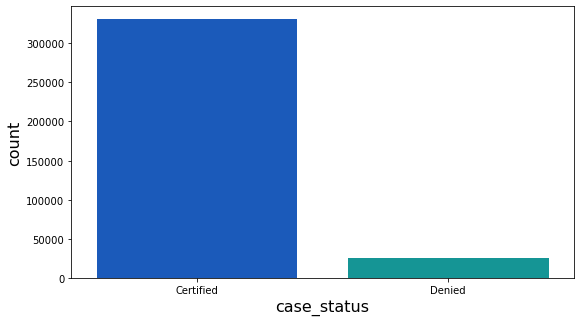

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(9,5)
sns.set_context(rc={"font.size":10, "axes.labelsize":16})
sns.countplot(x="case_status",data=df1, palette="winter")
fig.savefig(r'/Users/lucilleadenir/Desktop/Classwork/Final_Project/Green_Card/Figures/case_status')

### Number of Visa Application for each Case Status

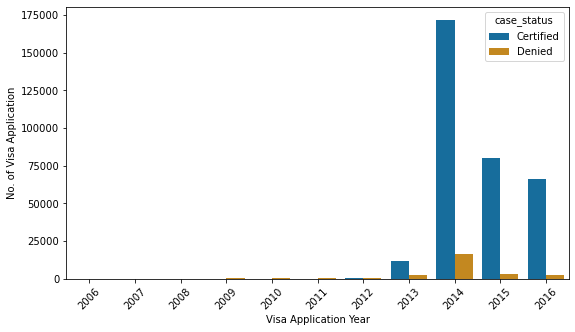

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(9,5)
sns.set_context(rc={"font.size":10, "axes.labelsize":16})
sns.countplot(x="case_received_year", hue="case_status",data=df1, palette = sns.color_palette("colorblind"))
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
ax.set(xlabel='Visa Application Year', ylabel='No. of Visa Application')
fig.savefig(r'/Users/lucilleadenir/Desktop/Classwork/Final_Project/Green_Card/Figures/case_year')

### Application Type Count

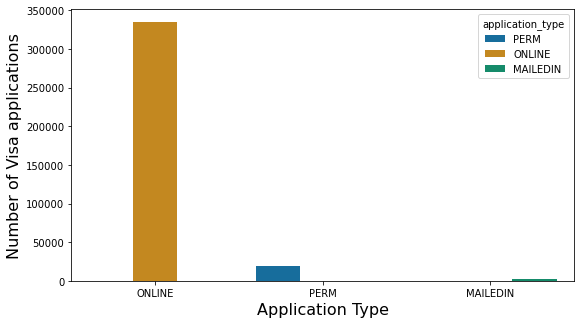

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(9,5)
sns.set_context(rc={"font.size":10, "axes.labelsize":16})
sns.countplot(x="application_type",hue= "application_type",data=df1, 
               palette = sns.color_palette("colorblind"), 
               order=df1.application_type.value_counts().iloc[:10].index)
ax.set(xlabel="Application Type", ylabel='Number of Visa applications')
fig.savefig(r'/Users/lucilleadenir/Desktop/Classwork/Final_Project/Green_Card/Figures/application_type')

### Number of Visa Application by Educational Level

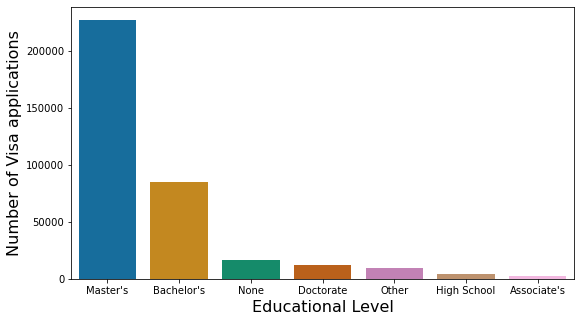

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(9,5)
sns.set_context(rc={"font.size":10, "axes.labelsize":16})
sns.countplot(x='foreign_worker_info_education',data=df1, 
               palette = sns.color_palette("colorblind"), 
               order=df1.foreign_worker_info_education.value_counts().iloc[:10].index)
ax.set(xlabel='Educational Level', ylabel='Number of Visa applications')
fig.savefig(r'/Users/lucilleadenir/Desktop/Classwork/Final_Project/Green_Card/Figures/education')

### Number of Visa Application submitted by Top 10 Employers

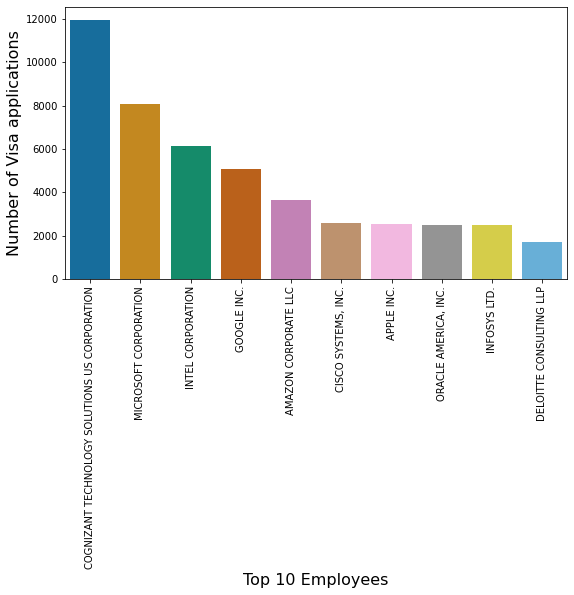

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(9,5)
sns.set_context(rc={"font.size":10, "axes.labelsize":16})
sns.countplot(x='employer_name',data=df1, 
               palette = sns.color_palette("colorblind"), 
               order=df1.employer_name.value_counts().iloc[:10].index)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
ax.set(xlabel='Top 10 Employees', ylabel='Number of Visa applications')
fig.savefig(r'/Users/lucilleadenir/Desktop/Classwork/Final_Project/Green_Card/Figures/employer')

### Number of Visa Application by Visa Type

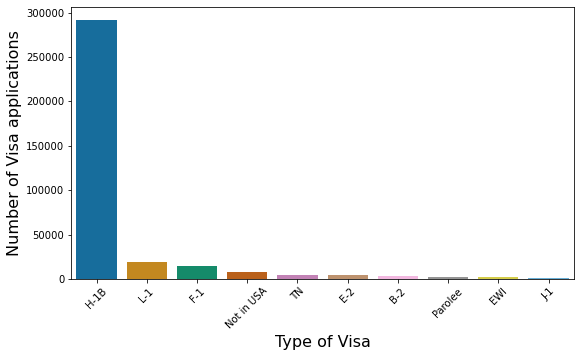

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(9,5)
sns.set_context(rc={"font.size":10, "axes.labelsize":16})
sns.countplot(x='class_of_admission',data=df1,palette = sns.color_palette("colorblind"), 
              order=df.class_of_admission.value_counts().iloc[:10].index)
plt.xticks(rotation=45)

ax.set(xlabel="Type of Visa", ylabel='Number of Visa applications')
fig.savefig(r'/Users/lucilleadenir/Desktop/Classwork/Final_Project/Green_Card/Figures/class')

### Number of Visa Application by Foreign Worker Citizenship

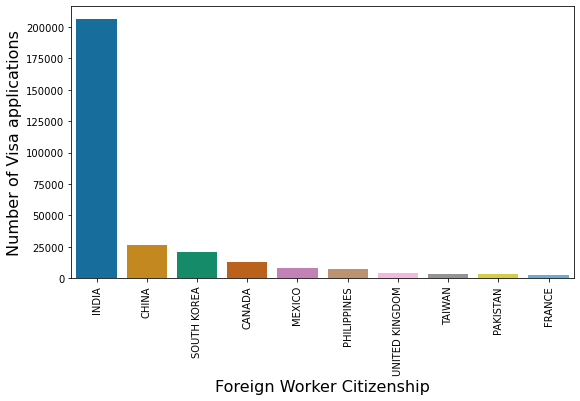

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(9,5)
sns.set_context(rc={"font.size":10, "axes.labelsize":16})
sns.countplot(x='country_of_citizenship',data=df1,palette = sns.color_palette("colorblind"), 
              order=df.country_of_citizenship.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

ax.set(xlabel="Foreign Worker Citizenship", ylabel='Number of Visa applications')
fig.savefig(r'/Users/lucilleadenir/Desktop/Classwork/Final_Project/Green_Card/Figures/fw_citizenship')

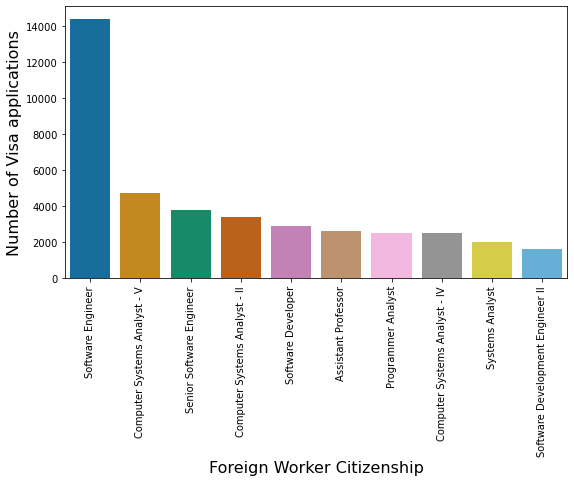

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(9,5)
sns.set_context(rc={"font.size":10, "axes.labelsize":16})
sns.countplot(x='job_info_job_title',data=df1,palette = sns.color_palette("colorblind"), 
              order=df.job_info_job_title.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

ax.set(xlabel="Foreign Worker Citizenship", ylabel='Number of Visa applications')
fig.savefig(r'/Users/lucilleadenir/Desktop/Classwork/Final_Project/Green_Card/Figures/job_title')

In [52]:
df1.shape

(356168, 29)

In [53]:
# Displaying number of missing values in each column
for column in df1.columns:
    print("Attribute '{}' contains ".format(column),  df1[column].isnull().sum().sum(), " missing values")

Attribute 'application_type' contains  0  missing values
Attribute 'case_received_year' contains  0  missing values
Attribute 'case_status' contains  0  missing values
Attribute 'class_of_admission' contains  0  missing values
Attribute 'decision_year' contains  0  missing values
Attribute 'employer_country' contains  126920  missing values
Attribute 'employer_name' contains  0  missing values
Attribute 'employer_num_employees' contains  0  missing values
Attribute 'employer_state' contains  0  missing values
Attribute 'foreign_worker_info_education' contains  0  missing values
Attribute 'foreign_worker_info_major' contains  0  missing values
Attribute 'foreign_worker_info_state' contains  0  missing values
Attribute 'fw_info_alt_edu_experience' contains  0  missing values
Attribute 'fw_info_birth_country' contains  0  missing values
Attribute 'country_of_citizenship' contains  0  missing values
Attribute 'fw_info_rel_occup_exp' contains  0  missing values
Attribute 'fw_info_req_experi

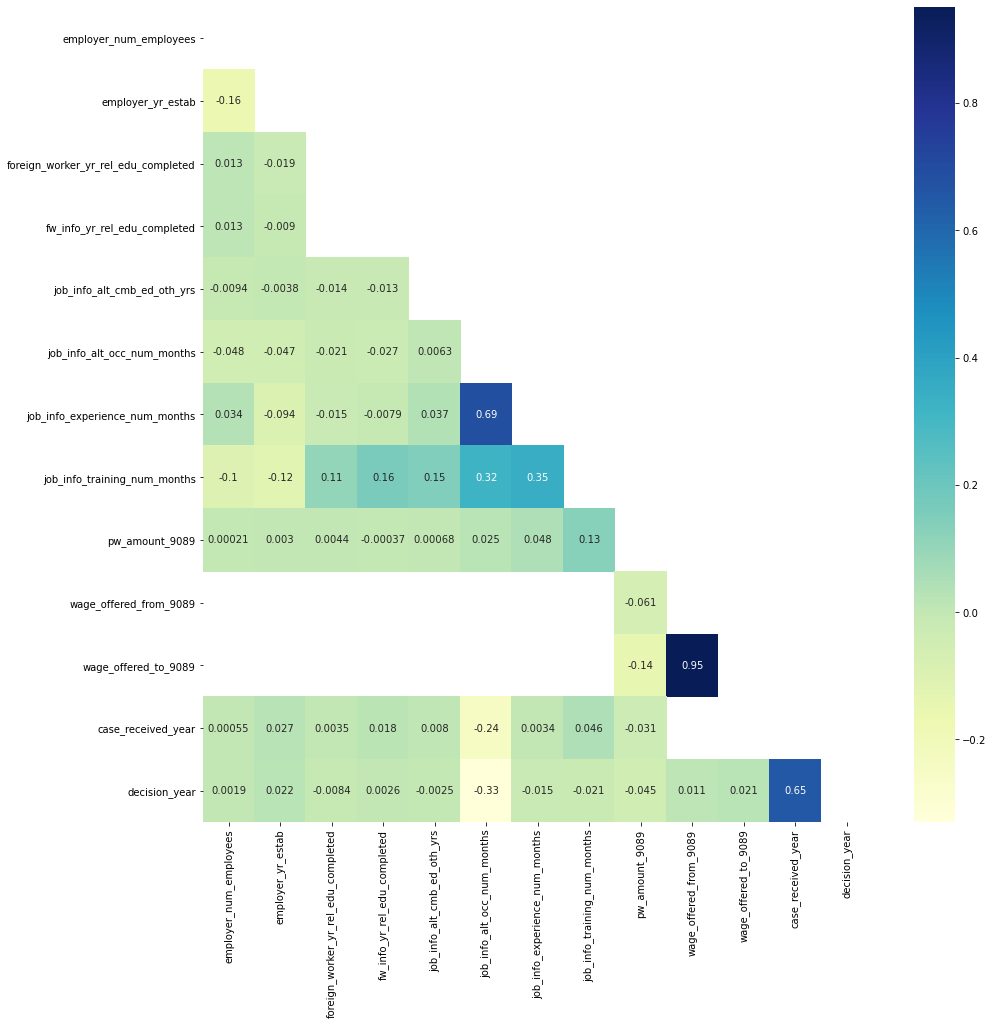

In [54]:
fig, ax = plt.subplots(figsize=(15,15)) 
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu", mask=matrix)
plt.xticks(rotation=90)
fig.savefig(r'/Users/lucilleadenir/Desktop/Classwork/Final_Project/Green_Card/Figures/heatmap')

In [55]:
#df1.to_csv(r'/Users/lucilleadenir/Desktop/Classwork/Final_Project/Green_Card/visa.csv')

In [56]:
#df1.to_json (r'/Users/lucilleadenir/Desktop/Classwork/Final_Project/Green_Card/visa.json')